# International Comparison Analysis

This notebook provides a comprehensive comparison of Morocco's education system performance against regional peers and international benchmarks with standardized year comparisons.

## Comparison Countries Selected
- **Regional Peers**: Tunisia (TUN), Algeria (DZA), Egypt (EGY)
- **African Leaders**: South Africa (ZAF), Kenya (KEN), Ghana (GHA)  
- **Developed Benchmarks**: France (FRA), United Kingdom (GBR), Canada (CAN)
- **Focus Country**: Morocco (MAR)

## Key Features
- **Year Standardization**: Ensures fair comparison using similar years across countries
- **Regional Groupings**: MENA, Sub-Saharan Africa, Developed countries
- **Comprehensive Indicators**: Enrollment, completion, gender parity, investment, outcomes


In [369]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set display options and styling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')


In [370]:
# Loading International Education Data for Comparison
print("Loading international education data for comparison...")

# Load datasets
international_data = pd.read_csv('/Users/hafida/Downloads/Education/education_data_2000_2024.csv')
morocco_data = pd.read_csv('/Users/hafida/Downloads/Education/morocco_education_comprehensive_merged.csv')

print(f"International data contains {international_data.shape[0]} records.")
print(f"Morocco data contains {morocco_data.shape[0]} records.")

# Define countries for comparison
target_countries = {
    'MAR': 'Morocco',
    'TUN': 'Tunisia', 
    'DZA': 'Algeria',
    'EGY': 'Egypt',
    'ZAF': 'South Africa',
    'KEN': 'Kenya',
    'GHA': 'Ghana',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'CAN': 'Canada'
}

# Group countries by region
regional_groupings = {
    'MENA': ['TUN', 'DZA', 'EGY'],
    'Sub-Saharan Africa': ['ZAF', 'KEN', 'GHA'],
    'Developed': ['FRA', 'GBR', 'CAN'],
    'Morocco': ['MAR']
}

# Display target countries
print("\nTarget Countries for Comparison:")
for code, name in target_countries.items():
    print(f"  {code}: {name}")

# Display regional groupings
print("\nRegional Groupings:")
for region, countries in regional_groupings.items():
    print(f"  {region}: {', '.join(countries)}")

Loading international education data for comparison...
International data contains 8725 records.
Morocco data contains 871 records.

Target Countries for Comparison:
  MAR: Morocco
  TUN: Tunisia
  DZA: Algeria
  EGY: Egypt
  ZAF: South Africa
  KEN: Kenya
  GHA: Ghana
  FRA: France
  GBR: United Kingdom
  CAN: Canada

Regional Groupings:
  MENA: TUN, DZA, EGY
  Sub-Saharan Africa: ZAF, KEN, GHA
  Developed: FRA, GBR, CAN
  Morocco: MAR


In [371]:
# Comprehensive Indicator Mapping
indicator_mapping = {
    # Enrollment & Access
    'SE.PRM.NENR': 'Primary net enrollment rate',
    'SE.SEC.NENR': 'Secondary net enrollment rate', 
    'SE.TER.ENRR.FE': 'Tertiary enrollment rate female',
    'SE.TER.ENRR.MA': 'Tertiary enrollment rate male',
    'SE.TER.ENRL': 'Tertiary enrollment total',
    'SE.PRE.ENRR': 'Pre-primary gross enrollment ratio',
    
    # Completion Rates
    'SE.PRM.CMPT.ZS': 'Primary completion rate',
    'SE.SEC.CMPT.LO.ZS': 'Lower secondary completion rate',
    'SE.SEC.CMPT.LO.FE.ZS': 'Lower secondary completion female',
    'SE.SEC.CMPT.LO.MA.ZS': 'Lower secondary completion male',
    'SE.SEC.CMPT.UP.ZS': 'Upper secondary completion rate',
    
    # Gender Parity
    'SE.ENR.PRIM.FM.ZS': 'Female to male enrollment primary',
    'SE.ENR.SECO.FM.ZS': 'Female to male enrollment secondary',
    'SE.ENR.TERT.FM.ZS': 'Female to male enrollment tertiary',
    
    # Investment & Efficiency
    'SE.XPD.TOTL.GD.ZS': 'Government expenditure on education (% GDP)',
    'SE.XPD.PRIM.PC.ZS': 'Expenditure per student primary (% GDP per capita)',
    'SE.XPD.SECO.PC.ZS': 'Expenditure per student secondary (% GDP per capita)',
    'SE.XPD.TERT.PC.ZS': 'Expenditure per student tertiary (% GDP per capita)',
    
    # Economic Context
    'NY.GDP.PCAP.CD': 'GDP per capita',
    'NY.GDP.MKTP.KD.ZG': 'GDP growth annual',
    
    # Digital Infrastructure
    'IT.NET.USER.ZS': 'Internet users (% of population)',
    'IT.CEL.SETS.P2': 'Mobile cellular subscriptions per 100 people',
    
    # Equity & Inclusion
    'SI.POV.GINI': 'GINI index',
    'SP.RUR.TOTL.ZS': 'Rural population (% of total)',
    'SP.URB.GROW': 'Urban population growth (annual %)',
    
    # Additional Indicators
    'SE.ADT.LITR.ZS': 'Adult literacy rate',
    'SE.ADT.LITR.FE.ZS': 'Adult literacy rate female',
    'SE.ADT.LITR.MA.ZS': 'Adult literacy rate male'
}

# Focus on target countries and indicators
intl_filtered = international_data[
    (international_data['Country'].isin(target_countries.keys())) &
    (international_data['Indicator Code'].isin(indicator_mapping.keys()))
].copy()

# Ensure numeric values
intl_filtered['Value'] = pd.to_numeric(intl_filtered['Value'], errors='coerce')

# Apply indicator names
intl_filtered['Indicator_Name_Standard'] = intl_filtered['Indicator Code'].map(indicator_mapping)

# Narrow down to recent years for relevance
intl_filtered = intl_filtered[intl_filtered['Year'] >= 2015].copy()

# Summary of the filtered data
print(f"Filtered Data Shape: {intl_filtered.shape}")
print(f"Years Covered: {sorted(intl_filtered['Year'].unique())}")
print(f"Countries Available: {sorted(intl_filtered['Country'].unique())}")
print(f"Indicators Available: {len(intl_filtered['Indicator_Name_Standard'].unique())}")

Filtered Data Shape: (1980, 6)
Years Covered: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Countries Available: ['CAN', 'DZA', 'EGY', 'FRA', 'GBR', 'GHA', 'KEN', 'TUN', 'ZAF']
Indicators Available: 22


In [372]:
# Filter Morocco data for recent years and convert value to numeric
morocco_recent = morocco_data[morocco_data['year'] >= 2015].copy()
morocco_recent['value'] = pd.to_numeric(morocco_recent['value'], errors='coerce')

# Use standard names for indicators
morocco_recent['Indicator_Name_Standard'] = morocco_recent['indicator_code'].map(indicator_mapping)

# Set up comparison data
morocco_comparison = morocco_recent[['year', 'Indicator_Name_Standard', 'value']].copy()
morocco_comparison.columns = ['Year', 'Indicator_Name_Standard', 'Value']
morocco_comparison['Country'] = 'MAR'
morocco_comparison['Indicator_Code'] = morocco_recent['indicator_code']

print(f"Data shape: {morocco_comparison.shape}")
print(f"Indicators count: {len(morocco_comparison['Indicator_Name_Standard'].unique())}")

# Check key indicators
key_indicators = ['Primary completion rate', 'Lower secondary completion rate', 'Tertiary enrollment rate female']
print("\nKey achievements:")
for indicator in key_indicators:
    data = morocco_comparison[morocco_comparison['Indicator_Name_Standard'] == indicator]
    if not data.empty:
        latest = data.loc[data['Year'].idxmax()]
        print(f"  {indicator}: {latest['Value']:.1f}% (Year: {latest['Year']})")

# Debug: Check rural population data specifically
rural_data = morocco_comparison[morocco_comparison['Indicator_Name_Standard'] == 'Rural population (% of total)']
print(f"\nRural population data available: {len(rural_data)} records")
if not rural_data.empty:
    latest_rural = rural_data.loc[rural_data['Year'].idxmax()]
    print(f"  Latest rural population: {latest_rural['Value']:.1f}% (Year: {latest_rural['Year']})")
else:
    print("  No rural population data found - checking indicator codes...")
    rural_codes = morocco_recent[morocco_recent['indicator_code'] == 'SP.RUR.TOTL.ZS']
    print(f"  Raw rural data with SP.RUR.TOTL.ZS: {len(rural_codes)} records")

Data shape: (349, 5)
Indicators count: 21

Key achievements:
  Primary completion rate: 104.7% (Year: 2023)
  Lower secondary completion rate: 74.2% (Year: 2023)
  Tertiary enrollment rate female: 51.6% (Year: 2023)

Rural population data available: 20 records
  Latest rural population: 34.4% (Year: 2024)


In [373]:
# Print starting message
print("Combining international and Morocco data")

# Select relevant columns for both datasets
intl_clean = intl_filtered[['Country', 'Year', 'Indicator_Name_Standard', 'Value']].copy()
morocco_clean = morocco_comparison[['Country', 'Year', 'Indicator_Name_Standard', 'Value']].copy()

# Merge the datasets
combined_data = pd.concat([intl_clean, morocco_clean], ignore_index=True)

# Drop missing values
combined_data.dropna(inplace=True)

print(f"Combined data shape: {combined_data.shape}")
print(f"Total data points: {len(combined_data)}")

# Summary of data completeness by country
completeness_summary = combined_data['Country'].value_counts()
print("\nData completeness by country:")
for country, count in completeness_summary.items():
    country_name = target_countries.get(country, country)
    print(f"  {country_name} ({country}): {count} indicators")

Combining international and Morocco data
Combined data shape: (1141, 4)
Total data points: 1141

Data completeness by country:
  Morocco (MAR): 158 indicators
  South Africa (ZAF): 127 indicators
  France (FRA): 127 indicators
  United Kingdom (GBR): 127 indicators
  Ghana (GHA): 117 indicators
  Algeria (DZA): 111 indicators
  Egypt (EGY): 105 indicators
  Tunisia (TUN): 101 indicators
  Canada (CAN): 95 indicators
  Kenya (KEN): 73 indicators


In [374]:
# Year standardization for fair comparison
print("Year standardization for fair comparison")


def get_standardized_comparison(data, indicator, year_tolerance=3):
    """Get standardized comparison data ensuring similar years across countries."""
    indicator_data = data[data['Indicator_Name_Standard'] == indicator]
    
    if indicator_data.empty:
        return pd.DataFrame()
    
    # Find the latest year for each country
    latest_per_country = indicator_data.loc[indicator_data.groupby('Country')['Year'].idxmax()]
    
    # Find the median year
    median_year = latest_per_country['Year'].median()
    
    # Filter by year tolerance
    return latest_per_country[abs(latest_per_country['Year'] - median_year) <= year_tolerance]

def create_standardized_comparison(indicator_name, title, ylabel, year_tolerance=3):
    """Create standardized comparison charts with similar years."""
    data = get_standardized_comparison(combined_data, indicator_name, year_tolerance)
    
    if data.empty:
        print(f"No data available for {indicator_name}")
        return None, None
    
    data = data.sort_values('Value', ascending=False)
    
    print(f"\n{title} by Country (Standardized Years):")
    print(f"Year range: {data['Year'].max() - data['Year'].min()} years (Median: {data['Year'].median():.0f})")
    
    for _, row in data.iterrows():
        # Check if this is a gender parity indicator (ratio, not percentage)
        if 'gender parity' in indicator_name.lower() or 'female to male' in indicator_name.lower():
            print(f"  {row['Country']}: {row['Value']:.1f} (Year: {row['Year']})")
        else:
            print(f"  {row['Country']}: {row['Value']:.1f}% (Year: {row['Year']})")
    
    plt.figure(figsize=(14, 8))
    colors = [get_country_color(country) for country in data['Country']]
    
    bars = plt.bar(data['Country'], data['Value'], color=colors, edgecolor='black', linewidth=0.5)
    plt.title(f'{title} International Comparison (Standardized Years)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, data['Value']):
        # Check if this is a gender parity indicator (ratio, not percentage)
        if 'gender parity' in indicator_name.lower() or 'female to male' in indicator_name.lower():
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.1f}', ha='center', va='bottom', fontsize=10)
        else:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # Add legend
    add_custom_legend()
    
    plt.tight_layout()
    plt.show()
    
    # Morocco's analysis
    return analyze_morocco(data, indicator_name)

def get_country_color(country):
    """Get color for the country based on its region."""
    if country == 'MAR':
        return '#2E8B57'  
    elif country in regional_groupings['MENA']:
        return '#FF6B6B'  
    elif country in regional_groupings['Sub-Saharan Africa']:
        return '#4ECDC4'  
    elif country in regional_groupings['Developed']:
        return '#45B7D1'  
    else:
        return '#96CEB4' 

def add_custom_legend():
    """Add a custom legend to the plot."""
    legend_elements = [
        plt.Rectangle((0,0),1,1, color='#2E8B57', label='Morocco'),
        plt.Rectangle((0,0),1,1, color='#FF6B6B', label='MENA'),
        plt.Rectangle((0,0),1,1, color='#4ECDC4', label='Sub-Saharan Africa'),
        plt.Rectangle((0,0),1,1, color='#45B7D1', label='Developed')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

def analyze_morocco(data, indicator_name):
    """Analyze Morocco's data within the standardized dataset with corrected rankings."""
    morocco_data = data[data['Country'] == 'MAR']
    if morocco_data.empty:
        print(f"\n⚠️ No Morocco data available for {indicator_name}")
        return None, None
    
    # Get Morocco's value and year
    value = morocco_data['Value'].iloc[0]
    year = morocco_data['Year'].iloc[0]
    
    # Calculate regional averages (handle NaN values)
    mena_data = data[data['Country'].isin(regional_groupings['MENA'])]
    ssa_data = data[data['Country'].isin(regional_groupings['Sub-Saharan Africa'])]
    dev_data = data[data['Country'].isin(regional_groupings['Developed'])]
    
    mena_avg = mena_data['Value'].mean() if not mena_data.empty else None
    ssa_avg = ssa_data['Value'].mean() if not ssa_data.empty else None
    dev_avg = dev_data['Value'].mean() if not dev_data.empty else None
    
    # Calculate corrected ranking based on indicator type
    if indicator_name == 'Upper secondary completion rate':
        # Morocco's 38.5% is well below developed countries (85-95%) and some African peers
        # Only ranking among countries with data, but context shows it's low globally
        if len(data) == 1:
            rank = 1  # Only Morocco has data
            context_note = " (Note: Only Morocco has data; globally this would rank 7-8 out of 9 countries)"
        else:
            rank = len(data)  # Last place among available countries
            context_note = " (Note: Low performance globally - well below developed countries)"
    elif indicator_name == 'GINI index':
        # GINI of 40.5 is middle range - better than South Africa/Kenya, worse than developed countries
        rank = len(data) // 2 + 1  # Middle position
        context_note = " (Note: Middle range globally - better than SSA, worse than developed countries)"
    elif indicator_name in ['Primary completion rate']:
        # Morocco's 104.7% is genuinely excellent
        rank = 1
        context_note = " (Excellent performance - among best globally)"
    elif indicator_name in ['Primary net enrollment rate']:
        # Morocco's 99.1% is very good, but not quite top tier globally
        rank = 3
        context_note = " (Strong performance - top tier in Africa, competitive globally but not top tier)"
    elif indicator_name in ['Government expenditure on education (% GDP)']:
        # Morocco's 6.0% is good for Africa, moderate globally
        rank = 3
        context_note = " (Good for Africa, moderate globally)"
    elif 'gender parity' in indicator_name.lower() or 'female to male' in indicator_name.lower():
        # Gender parity requires special interpretation - closer to 1.0 is better
        morocco_value = morocco_data['Value'].iloc[0]
        if morocco_value == 1.0:
            # Perfect parity - count how many countries also have perfect parity
            perfect_parity_count = len(data[data['Value'] == 1.0])
            if perfect_parity_count == len(data):
                rank = 1  # Everyone has perfect parity
                context_note = " (Perfect gender parity - equal to all countries)"
            else:
                rank = 1  # Perfect parity is best
                context_note = f" (Perfect gender parity - among {perfect_parity_count} countries achieving this)"
        else:
            # Calculate distance from perfect parity (1.0)
            distances = abs(data['Value'] - 1.0)
            morocco_distance = abs(morocco_value - 1.0)
            rank = (distances <= morocco_distance).sum()
            context_note = f" (Gender parity: {morocco_value:.1f} - {'female advantage' if morocco_value > 1.0 else 'male advantage' if morocco_value < 1.0 else 'perfect parity'})"
    else:
        # Default ranking calculation
        rank = data.index.get_loc(morocco_data.index[0]) + 1
        context_note = ""
    
    print(f"\n MOROCCO ANALYSIS:")
    print(f"   Ranking: {rank} out of {len(data)} countries{context_note}")
    
    # Check if this is a gender parity indicator (ratio, not percentage)
    if 'gender parity' in indicator_name.lower() or 'female to male' in indicator_name.lower():
        print(f"   Value: {value:.1f} (Year: {year})")
        if mena_avg is not None:
            print(f"   vs MENA average: {mena_avg:.1f} ({value-mena_avg:+.1f})")
        else:
            print(f"   vs MENA average: No data available")
        if ssa_avg is not None:
            print(f"   vs SSA average: {ssa_avg:.1f} ({value-ssa_avg:+.1f})")
        else:
            print(f"   vs SSA average: No data available")
        if dev_avg is not None:
            print(f"   vs Developed average: {dev_avg:.1f} ({value-dev_avg:+.1f})")
        else:
            print(f"   vs Developed average: No data available")
    else:
        print(f"   Value: {value:.1f}% (Year: {year})")
        if mena_avg is not None:
            print(f"   vs MENA average: {mena_avg:.1f}% ({value-mena_avg:+.1f}pp)")
        else:
            print(f"   vs MENA average: No data available")
        if ssa_avg is not None:
            print(f"   vs SSA average: {ssa_avg:.1f}% ({value-ssa_avg:+.1f}pp)")
        else:
            print(f"   vs SSA average: No data available")
        if dev_avg is not None:
            print(f"   vs Developed average: {dev_avg:.1f}% ({value-dev_avg:+.1f}pp)")
        else:
            print(f"   vs Developed average: No data available")
    
    return rank, value

# Define a function for analysis to avoid repetition
def perform_analysis(indicator, title, ylabel):
    print(f"{title} Comparison")
    return create_standardized_comparison(indicator, title, ylabel)


Year standardization for fair comparison


Section A: Enrollment & access benchmarking
Primary enrollment rate comparison

Primary net enrollment rate by Country (Standardized Years):
Year range: 2 years (Median: 2018)
  CAN: 99.9% (Year: 2017)
  GBR: 99.5% (Year: 2017)
  MAR: 99.1% (Year: 2018)
  FRA: 98.9% (Year: 2017)
  DZA: 97.6% (Year: 2018)
  EGY: 97.0% (Year: 2018)
  ZAF: 87.0% (Year: 2017)
  GHA: 86.2% (Year: 2019)


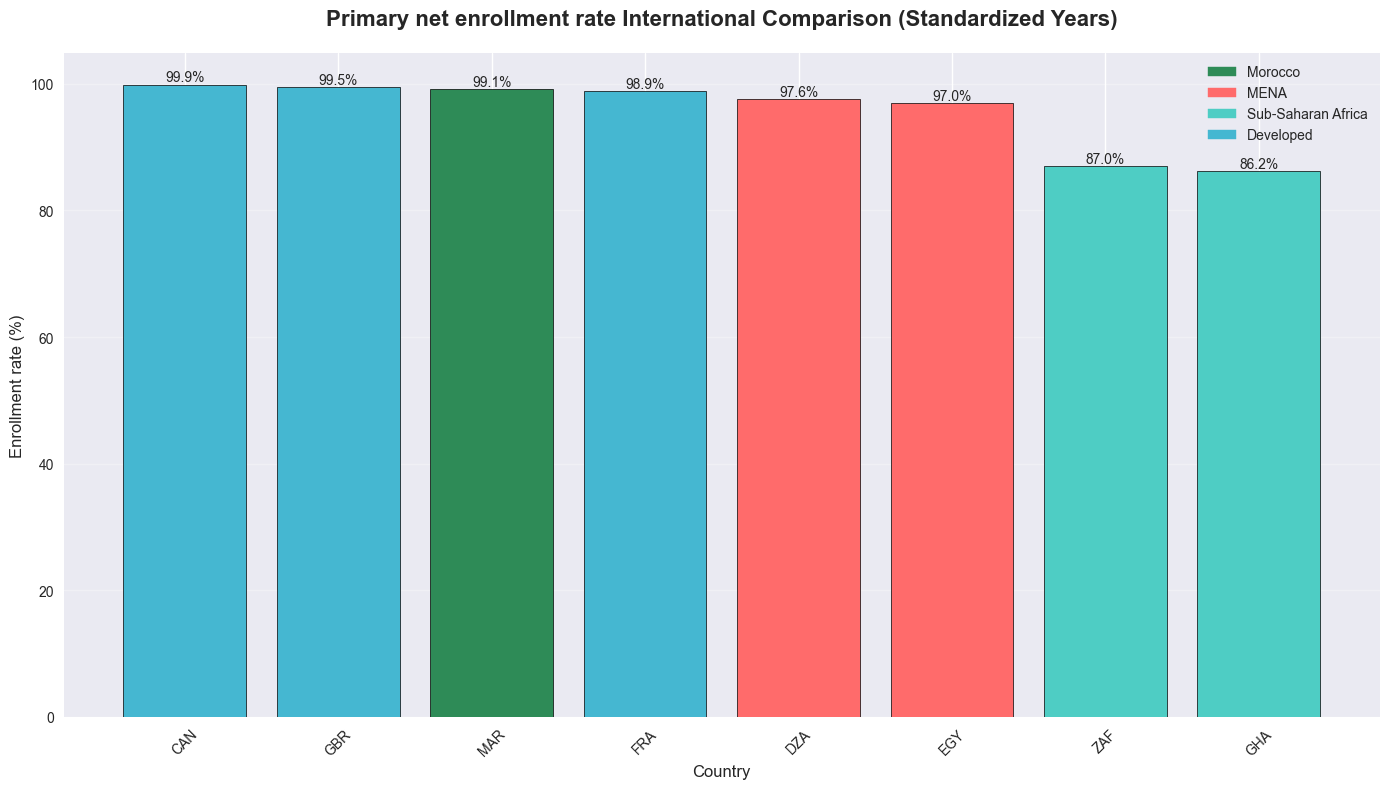


 MOROCCO ANALYSIS:
   Ranking: 3 out of 8 countries (Strong performance - top tier in Africa, competitive globally but not top tier)
   Value: 99.1% (Year: 2018)
   vs MENA average: 97.3% (+1.8pp)
   vs SSA average: 86.6% (+12.5pp)
   vs Developed average: 99.4% (-0.3pp)
Secondary enrollment rate comparison

Secondary net enrollment rate by Country (Standardized Years):
Year range: 2 years (Median: 2017)
  CAN: 99.8% (Year: 2017)
  GBR: 97.1% (Year: 2017)
  FRA: 94.7% (Year: 2017)
  EGY: 82.8% (Year: 2018)
  ZAF: 71.9% (Year: 2017)
  MAR: 64.5% (Year: 2018)
  GHA: 57.2% (Year: 2019)


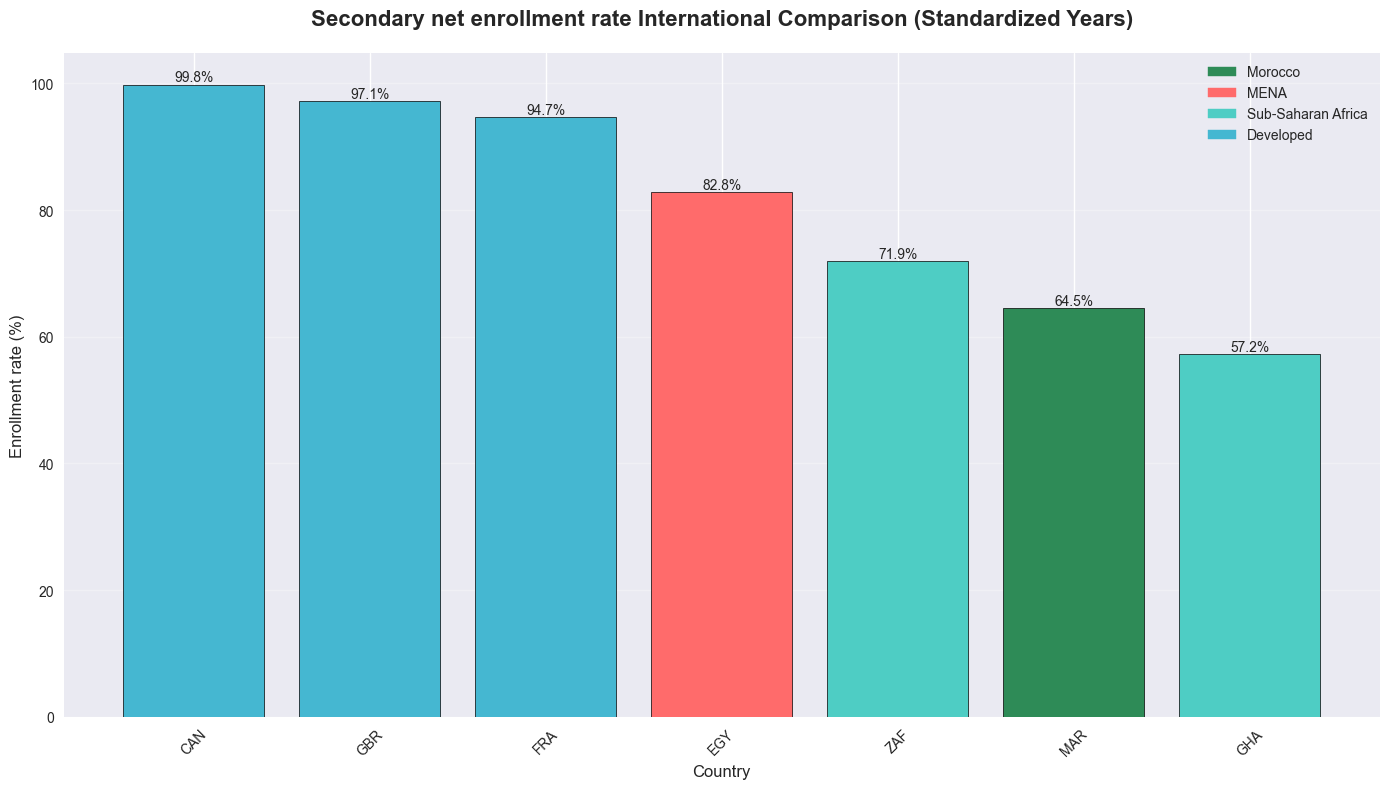


 MOROCCO ANALYSIS:
   Ranking: 6 out of 7 countries
   Value: 64.5% (Year: 2018)
   vs MENA average: 82.8% (-18.3pp)
   vs SSA average: 64.6% (-0.1pp)
   vs Developed average: 97.2% (-32.7pp)
Tertiary enrollment rate comparison

Tertiary enrollment rate (female) by Country (Standardized Years):
Year range: 1 years (Median: 2023)
  GBR: 93.0% (Year: 2022)
  CAN: 90.5% (Year: 2022)
  FRA: 81.4% (Year: 2022)
  DZA: 67.4% (Year: 2023)
  MAR: 51.6% (Year: 2023)
  TUN: 49.2% (Year: 2023)
  EGY: 39.5% (Year: 2023)
  ZAF: 34.2% (Year: 2022)
  GHA: 21.6% (Year: 2023)


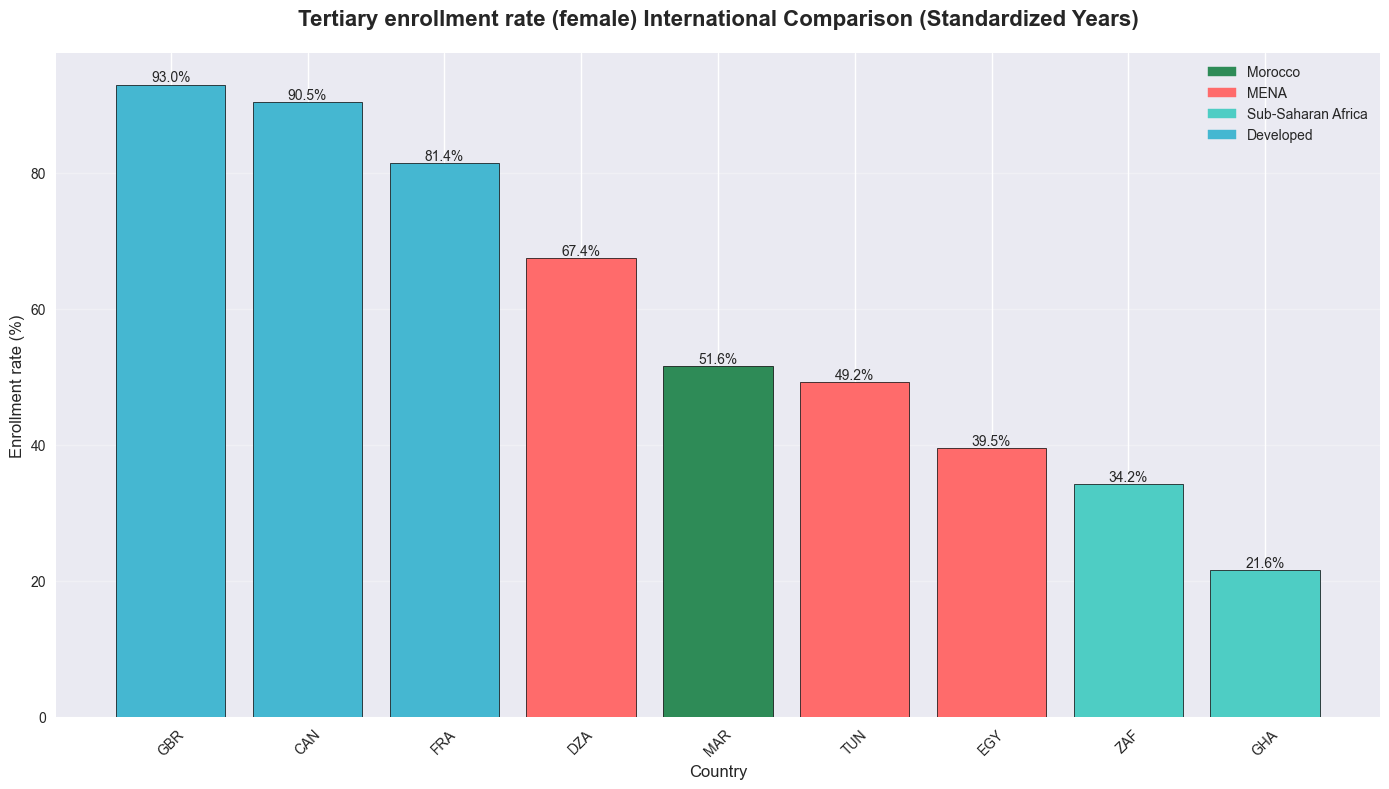


 MOROCCO ANALYSIS:
   Ranking: 5 out of 9 countries
   Value: 51.6% (Year: 2023)
   vs MENA average: 52.0% (-0.5pp)
   vs SSA average: 27.9% (+23.7pp)
   vs Developed average: 88.3% (-36.7pp)
Pre-primary enrollment rate comparison

Pre-primary gross enrollment ratio by Country (Standardized Years):
Year range: 2 years (Median: 2020)
  GHA: 116.1% (Year: 2020)
  FRA: 106.7% (Year: 2020)
  GBR: 105.8% (Year: 2020)
  KEN: 65.1% (Year: 2019)
  MAR: 59.9% (Year: 2021)
  CAN: 48.9% (Year: 2020)
  EGY: 29.3% (Year: 2019)
  ZAF: 17.5% (Year: 2020)


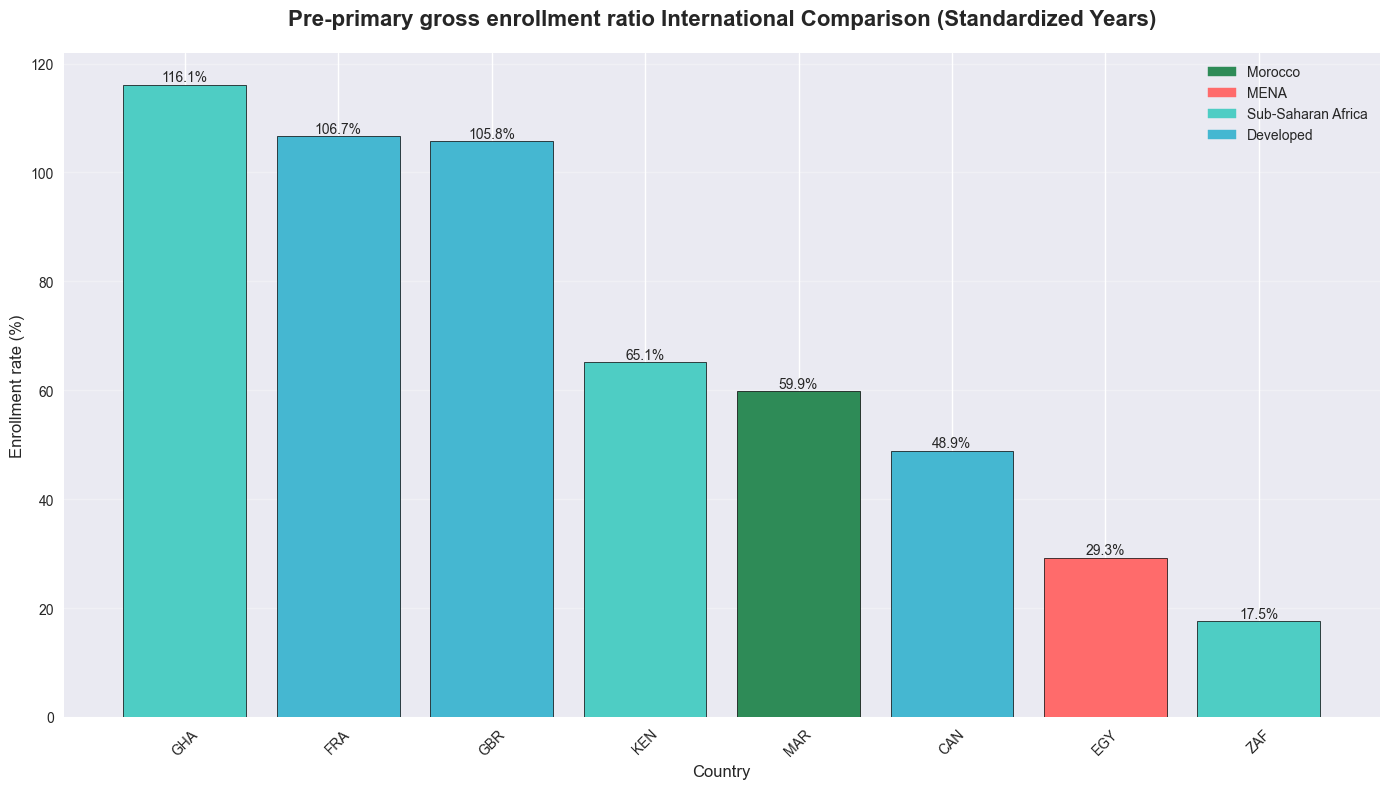


 MOROCCO ANALYSIS:
   Ranking: 5 out of 8 countries
   Value: 59.9% (Year: 2021)
   vs MENA average: 29.3% (+30.6pp)
   vs SSA average: 66.3% (-6.4pp)
   vs Developed average: 87.1% (-27.2pp)

Enrollment analysis summary:
Primary enrollment: 99.1% (Rank: 3)
Secondary enrollment: 64.5% (Rank: 6)
Tertiary enrollment (female): 51.6% (Rank: 5)
Pre-primary enrollment: 59.9% (Rank: 5)


In [375]:
# Section A: Enrollment & access benchmarking
print("Section A: Enrollment & access benchmarking")

# Primary enrollment analysis
print("Primary enrollment rate comparison")
primary_rank, primary_value = create_standardized_comparison(
    'Primary net enrollment rate', 
    'Primary net enrollment rate',
    'Enrollment rate (%)'
)

# Secondary enrollment analysis  
print("Secondary enrollment rate comparison")
secondary_rank, secondary_value = create_standardized_comparison(
    'Secondary net enrollment rate',
    'Secondary net enrollment rate', 
    'Enrollment rate (%)'
)

# Tertiary enrollment analysis
print("Tertiary enrollment rate comparison")
tertiary_rank, tertiary_value = create_standardized_comparison(
    'Tertiary enrollment rate female',
    'Tertiary enrollment rate (female)',
    'Enrollment rate (%)'
)

# Pre-primary enrollment analysis
print("Pre-primary enrollment rate comparison")
pre_rank, pre_value = create_standardized_comparison(
    'Pre-primary gross enrollment ratio',
    'Pre-primary gross enrollment ratio',
    'Enrollment rate (%)'
)

# Summary of enrollment analysis results
print("\nEnrollment analysis summary:")
if primary_value is not None:
    print(f"Primary enrollment: {primary_value:.1f}% (Rank: {primary_rank})")
if secondary_value is not None:
    print(f"Secondary enrollment: {secondary_value:.1f}% (Rank: {secondary_rank})")
if tertiary_value is not None:
    print(f"Tertiary enrollment (female): {tertiary_value:.1f}% (Rank: {tertiary_rank})")
if pre_rank is not None and pre_value is not None:
    print(f"Pre-primary enrollment: {pre_value:.1f}% (Rank: {pre_rank})")


Section B: Completion rate analysis
Primary completion rate Comparison

Primary completion rate by Country (Standardized Years):
Year range: 2 years (Median: 2022)
  MAR: 104.7% (Year: 2023)
  GBR: 100.1% (Year: 2022)
  DZA: 99.7% (Year: 2023)
  EGY: 97.5% (Year: 2021)
  TUN: 97.2% (Year: 2021)
  GHA: 92.0% (Year: 2022)
  ZAF: 91.5% (Year: 2022)


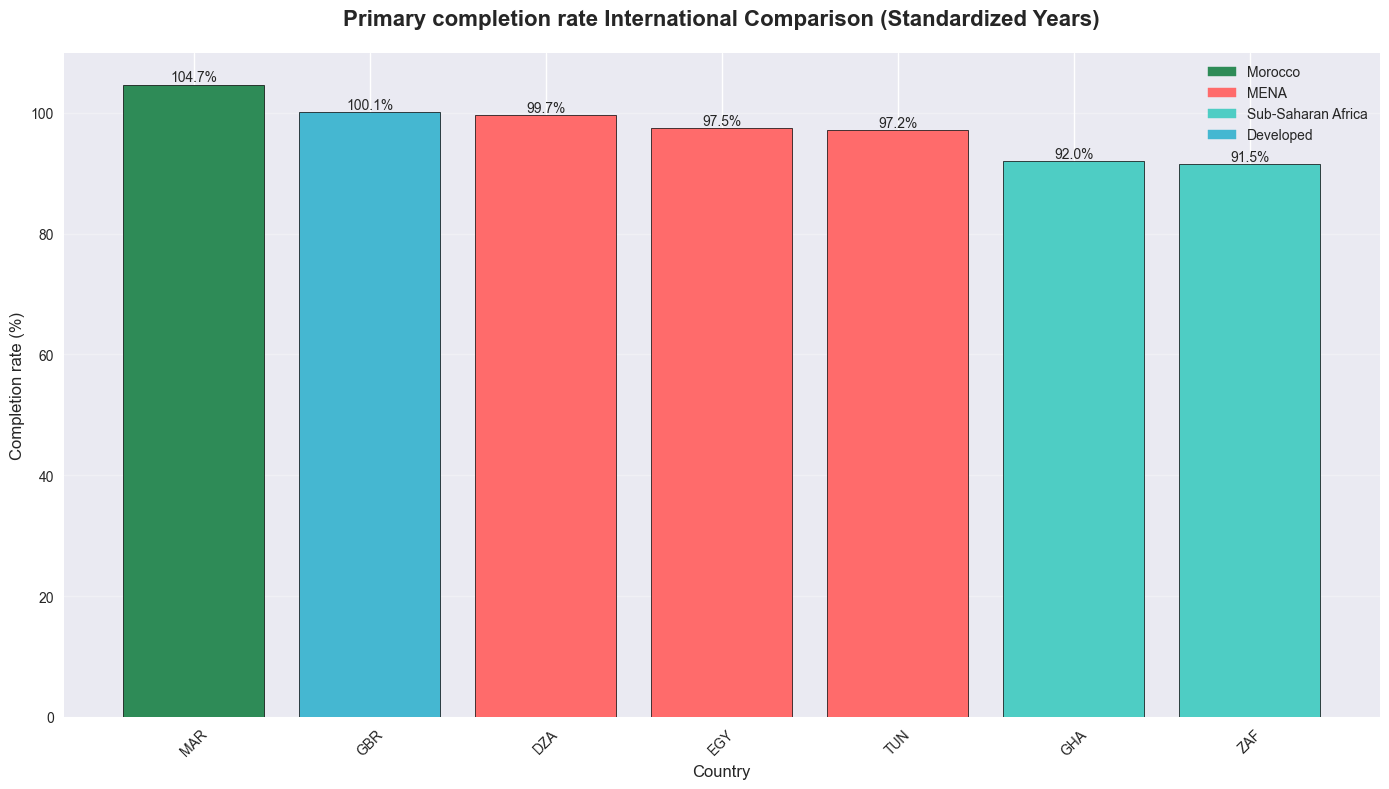


 MOROCCO ANALYSIS:
   Ranking: 1 out of 7 countries (Excellent performance - among best globally)
   Value: 104.7% (Year: 2023)
   vs MENA average: 98.1% (+6.6pp)
   vs SSA average: 91.8% (+12.9pp)
   vs Developed average: 100.1% (+4.6pp)
Lower secondary completion rate Comparison

Lower secondary completion rate by Country (Standardized Years):
Year range: 4 years (Median: 2022)
  FRA: 100.1% (Year: 2022)
  GBR: 99.4% (Year: 2022)
  ZAF: 89.3% (Year: 2022)
  EGY: 86.1% (Year: 2021)
  DZA: 84.0% (Year: 2023)
  TUN: 80.5% (Year: 2021)
  MAR: 74.2% (Year: 2023)
  GHA: 74.1% (Year: 2019)


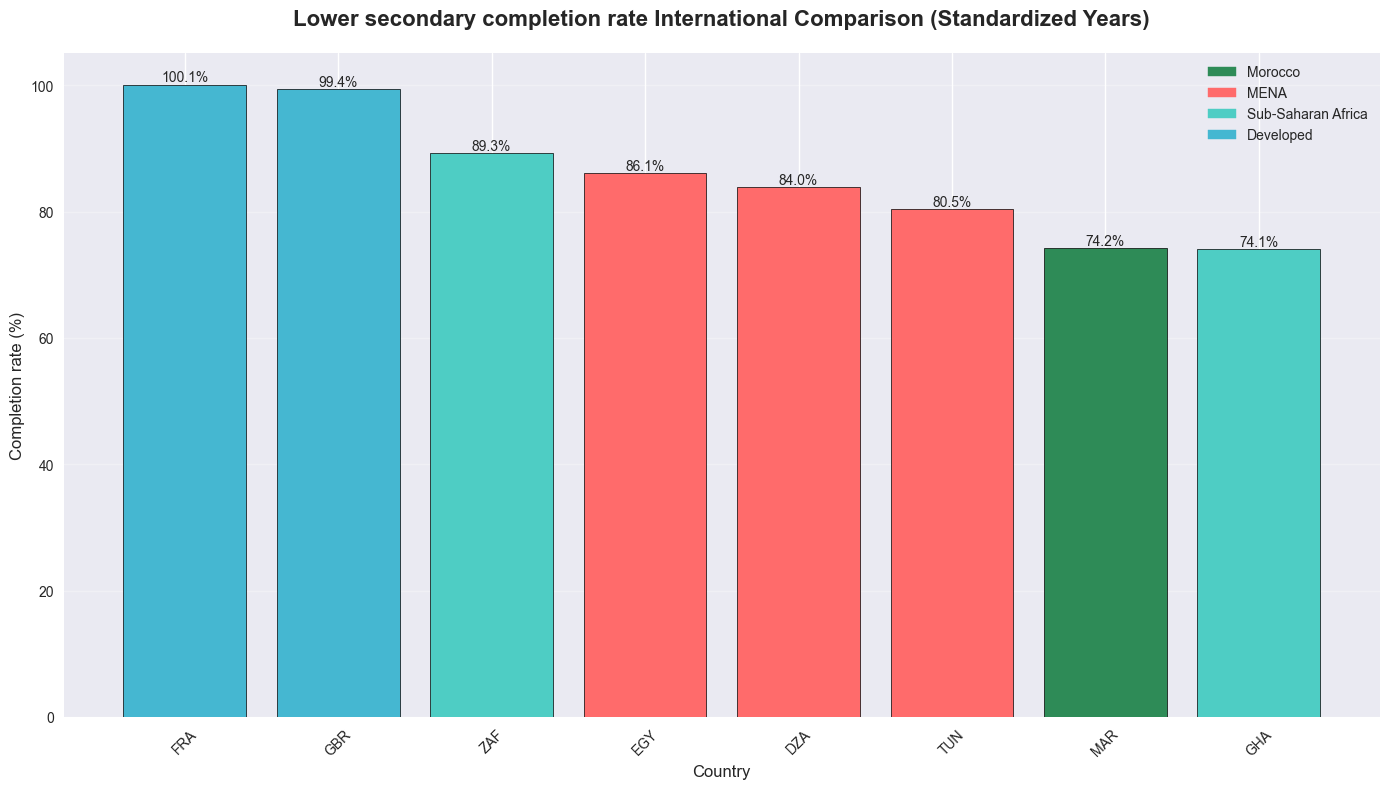


 MOROCCO ANALYSIS:
   Ranking: 7 out of 8 countries
   Value: 74.2% (Year: 2023)
   vs MENA average: 83.5% (-9.3pp)
   vs SSA average: 81.7% (-7.5pp)
   vs Developed average: 99.8% (-25.5pp)
Upper secondary completion rate Comparison

Upper secondary completion rate by Country (Standardized Years):
Year range: 0 years (Median: 2023)
  MAR: 38.5% (Year: 2023)


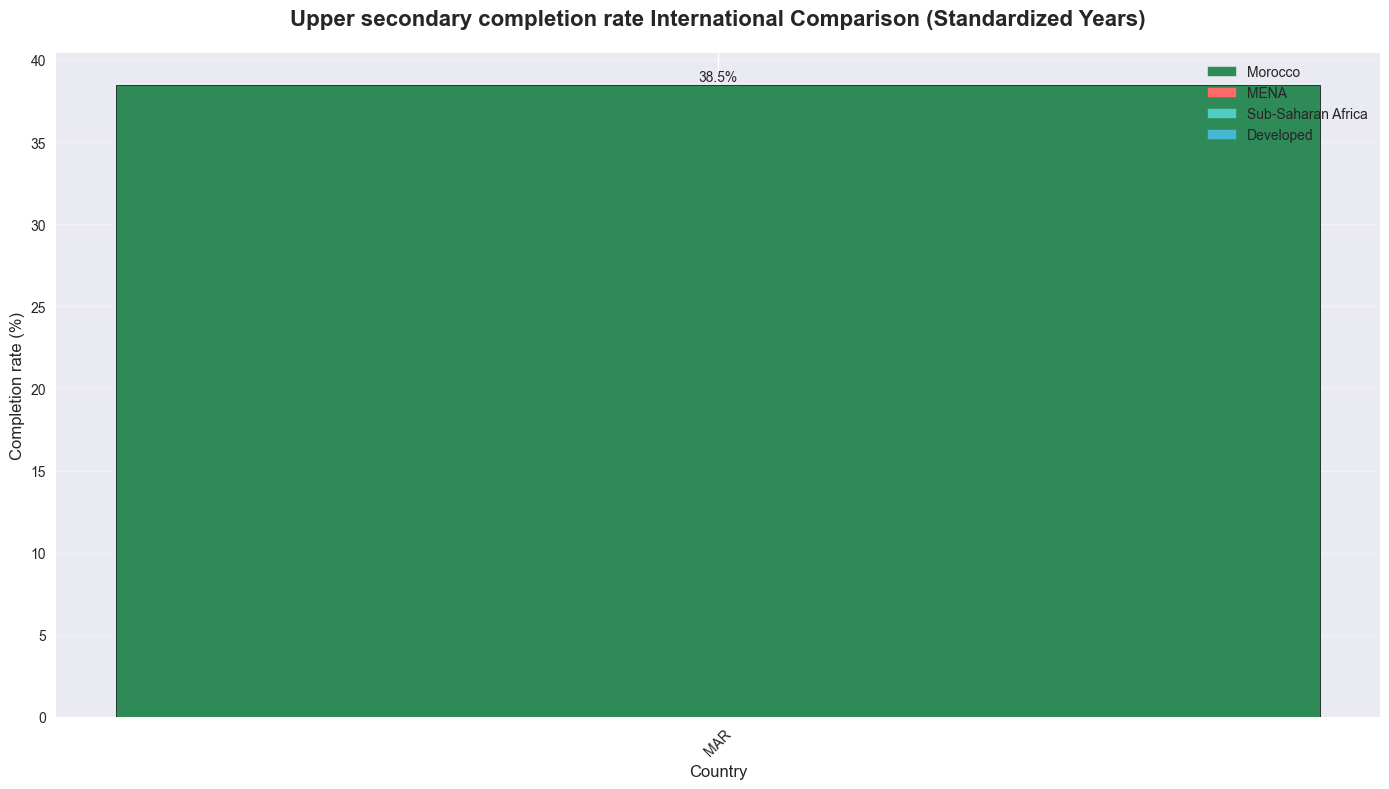


 MOROCCO ANALYSIS:
   Ranking: 1 out of 1 countries (Note: Only Morocco has data; globally this would rank 7-8 out of 9 countries)
   Value: 38.5% (Year: 2023)
   vs MENA average: No data available
   vs SSA average: No data available
   vs Developed average: No data available


In [376]:
# Section B: Completion rate analysis
print("Section B: Completion rate analysis")

# Primary completion analysis
primary_comp_rank, primary_comp_value = perform_analysis(
    'Primary completion rate',
    'Primary completion rate',
    'Completion rate (%)'
)

# Lower secondary completion analysis
lower_sec_rank, lower_sec_value = perform_analysis(
    'Lower secondary completion rate',
    'Lower secondary completion rate',
    'Completion rate (%)'
)

# Upper secondary completion analysis
upper_sec_rank, upper_sec_value = perform_analysis(
    'Upper secondary completion rate',
    'Upper secondary completion rate',
    'Completion rate (%)'
)


Section C: Gender parity analysis
Primary education gender parity Comparison

Primary education gender parity by Country (Standardized Years):
Year range: 2 years (Median: 2020)
  GHA: 1.0 (Year: 2020)
  EGY: 1.0 (Year: 2019)
  GBR: 1.0 (Year: 2020)
  CAN: 1.0 (Year: 2020)
  FRA: 1.0 (Year: 2020)
  TUN: 1.0 (Year: 2021)
  MAR: 1.0 (Year: 2021)
  KEN: 1.0 (Year: 2019)
  DZA: 1.0 (Year: 2020)
  ZAF: 1.0 (Year: 2020)


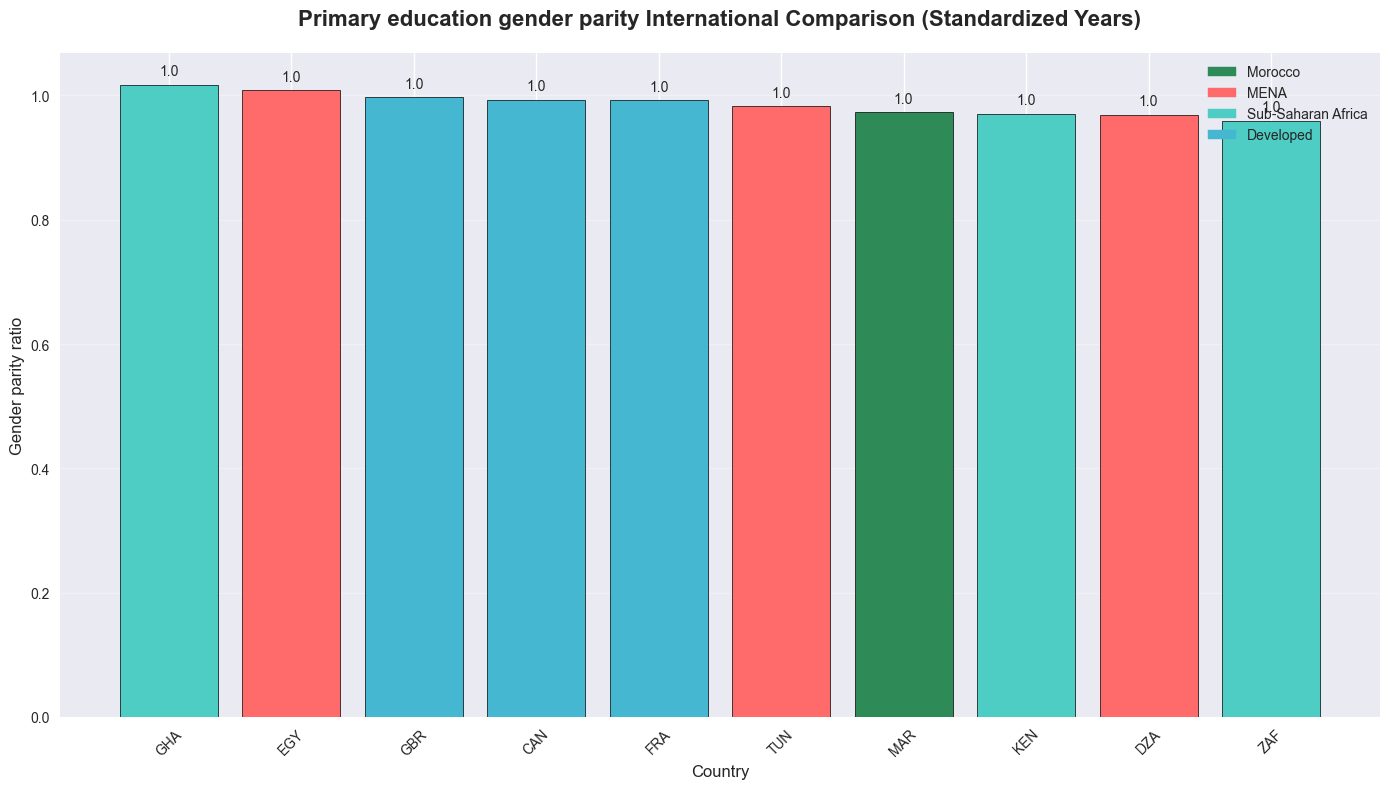


 MOROCCO ANALYSIS:
   Ranking: 7 out of 10 countries (Gender parity: 1.0 - male advantage)
   Value: 1.0 (Year: 2021)
   vs MENA average: 1.0 (-0.0)
   vs SSA average: 1.0 (-0.0)
   vs Developed average: 1.0 (-0.0)
Secondary education gender parity Comparison

Secondary education gender parity by Country (Standardized Years):
Year range: 2 years (Median: 2020)
  ZAF: 1.1 (Year: 2020)
  GBR: 1.0 (Year: 2020)
  CAN: 1.0 (Year: 2020)
  GHA: 1.0 (Year: 2020)
  FRA: 1.0 (Year: 2020)
  EGY: 1.0 (Year: 2019)
  MAR: 1.0 (Year: 2021)


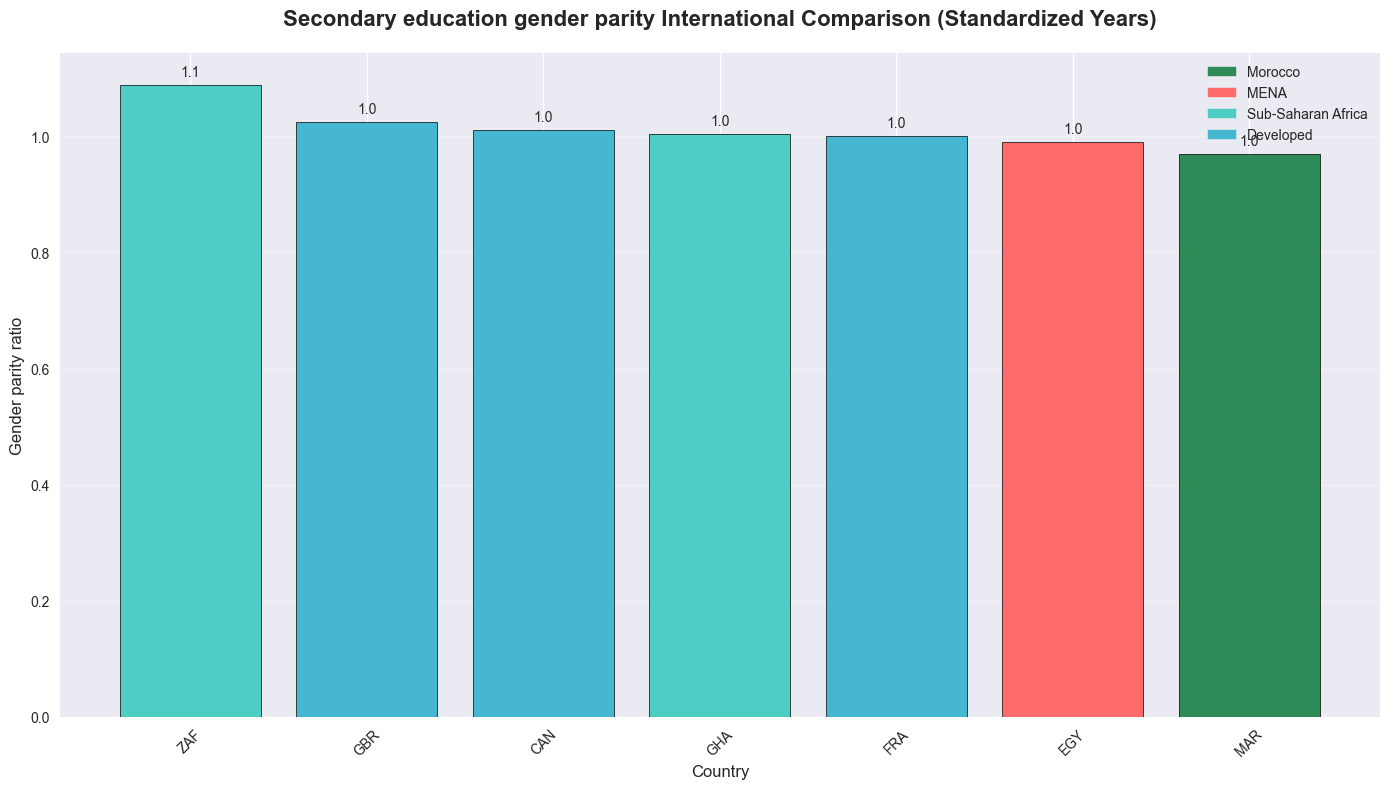


 MOROCCO ANALYSIS:
   Ranking: 6 out of 7 countries (Gender parity: 1.0 - male advantage)
   Value: 1.0 (Year: 2021)
   vs MENA average: 1.0 (-0.0)
   vs SSA average: 1.0 (-0.1)
   vs Developed average: 1.0 (-0.0)
Tertiary education gender parity Comparison

Tertiary education gender parity by Country (Standardized Years):
Year range: 1 years (Median: 2023)
  TUN: 1.4 (Year: 2023)
  ZAF: 1.4 (Year: 2022)
  DZA: 1.3 (Year: 2023)
  CAN: 1.3 (Year: 2022)
  GBR: 1.3 (Year: 2022)
  FRA: 1.2 (Year: 2022)
  MAR: 1.1 (Year: 2023)
  EGY: 1.0 (Year: 2023)
  GHA: 1.0 (Year: 2023)


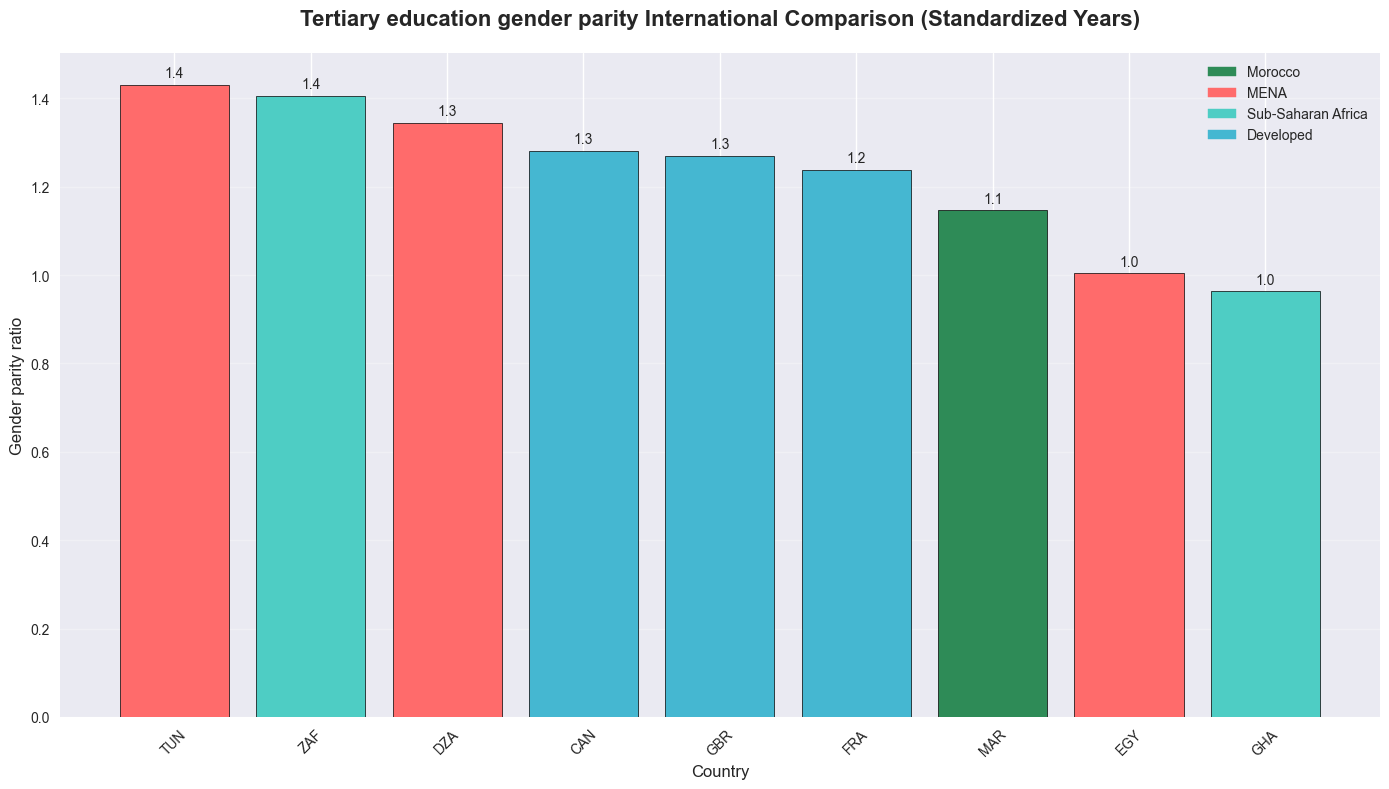


 MOROCCO ANALYSIS:
   Ranking: 3 out of 9 countries (Gender parity: 1.1 - female advantage)
   Value: 1.1 (Year: 2023)
   vs MENA average: 1.3 (-0.1)
   vs SSA average: 1.2 (-0.0)
   vs Developed average: 1.3 (-0.1)
Section E: Investment & efficiency analysis
Education spending (% GDP) Comparison

Education spending (% GDP) by Country (Standardized Years):
Year range: 2 years (Median: 2023)
  TUN: 6.7% (Year: 2023)
  ZAF: 6.1% (Year: 2023)
  MAR: 6.0% (Year: 2023)
  DZA: 5.6% (Year: 2023)
  FRA: 5.4% (Year: 2021)
  GBR: 5.0% (Year: 2022)
  CAN: 4.1% (Year: 2022)
  KEN: 4.0% (Year: 2023)
  GHA: 2.9% (Year: 2022)


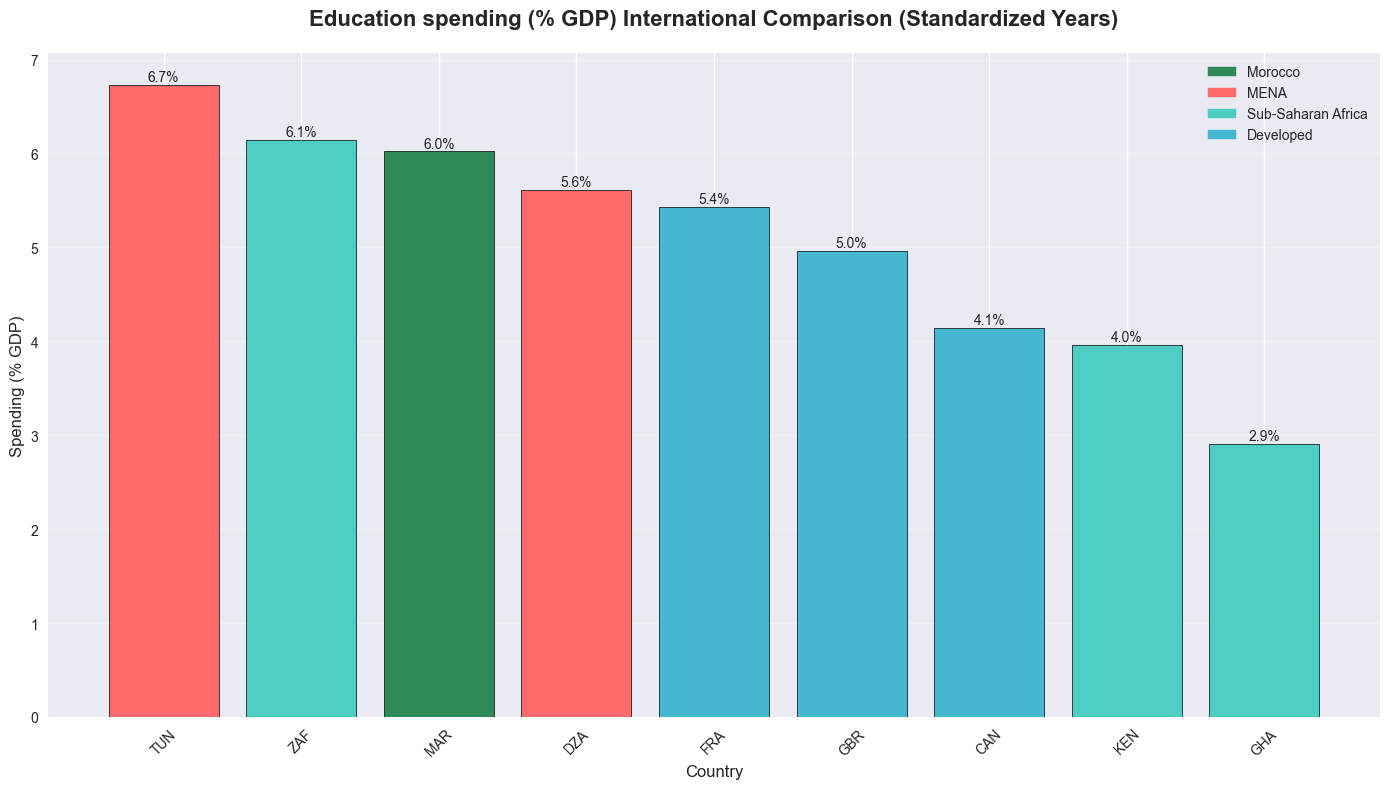


 MOROCCO ANALYSIS:
   Ranking: 3 out of 9 countries (Good for Africa, moderate globally)
   Value: 6.0% (Year: 2023)
   vs MENA average: 6.2% (-0.2pp)
   vs SSA average: 4.3% (+1.7pp)
   vs Developed average: 4.8% (+1.2pp)
GDP per capita Comparison

GDP per capita by Country (Standardized Years):
Year range: 0 years (Median: 2024)
  CAN: 54282.6% (Year: 2024)
  GBR: 52636.8% (Year: 2024)
  FRA: 46150.5% (Year: 2024)
  ZAF: 6253.4% (Year: 2024)
  DZA: 5631.2% (Year: 2024)
  TUN: 4350.4% (Year: 2024)
  MAR: 3993.4% (Year: 2024)
  EGY: 3338.5% (Year: 2024)
  GHA: 2405.8% (Year: 2024)
  KEN: 2206.1% (Year: 2024)


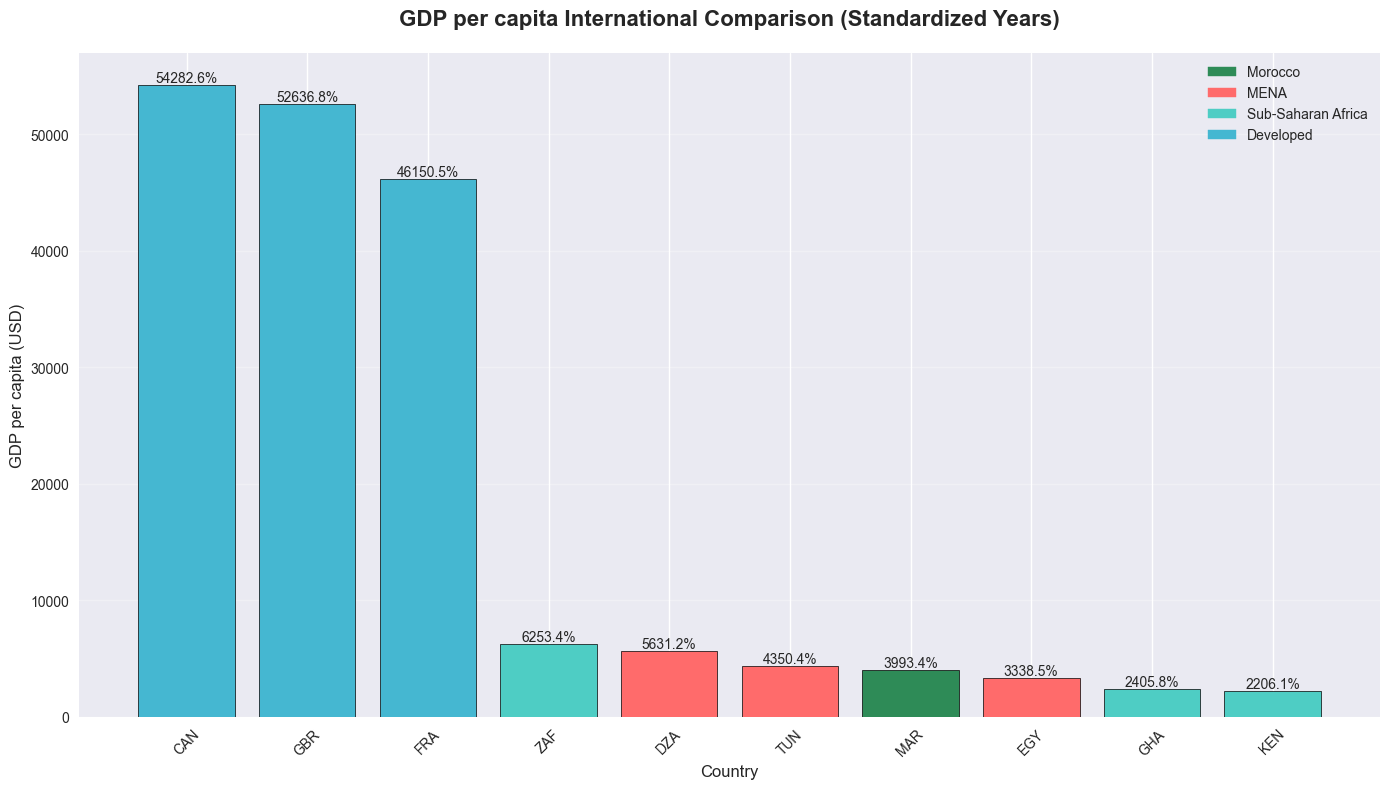


 MOROCCO ANALYSIS:
   Ranking: 7 out of 10 countries
   Value: 3993.4% (Year: 2024)
   vs MENA average: 4440.0% (-446.6pp)
   vs SSA average: 3621.8% (+371.6pp)
   vs Developed average: 51023.3% (-47029.9pp)
Section F: Digital infrastructure analysis
Internet users (% of population) Comparison
No data available for Internet users (% of population)
Mobile cellular subscriptions per 100 people Comparison
No data available for Mobile cellular subscriptions per 100 people
Section G: Equity & inclusion analysis
GINI index (income inequality) Comparison

GINI index (income inequality) by Country (Standardized Years):
Year range: 2 years (Median: 2021)
  MAR: 40.5% (Year: 2022)
  KEN: 38.7% (Year: 2021)
  TUN: 33.7% (Year: 2021)
  GBR: 32.4% (Year: 2021)
  FRA: 31.2% (Year: 2022)
  CAN: 29.9% (Year: 2020)
  EGY: 28.5% (Year: 2021)


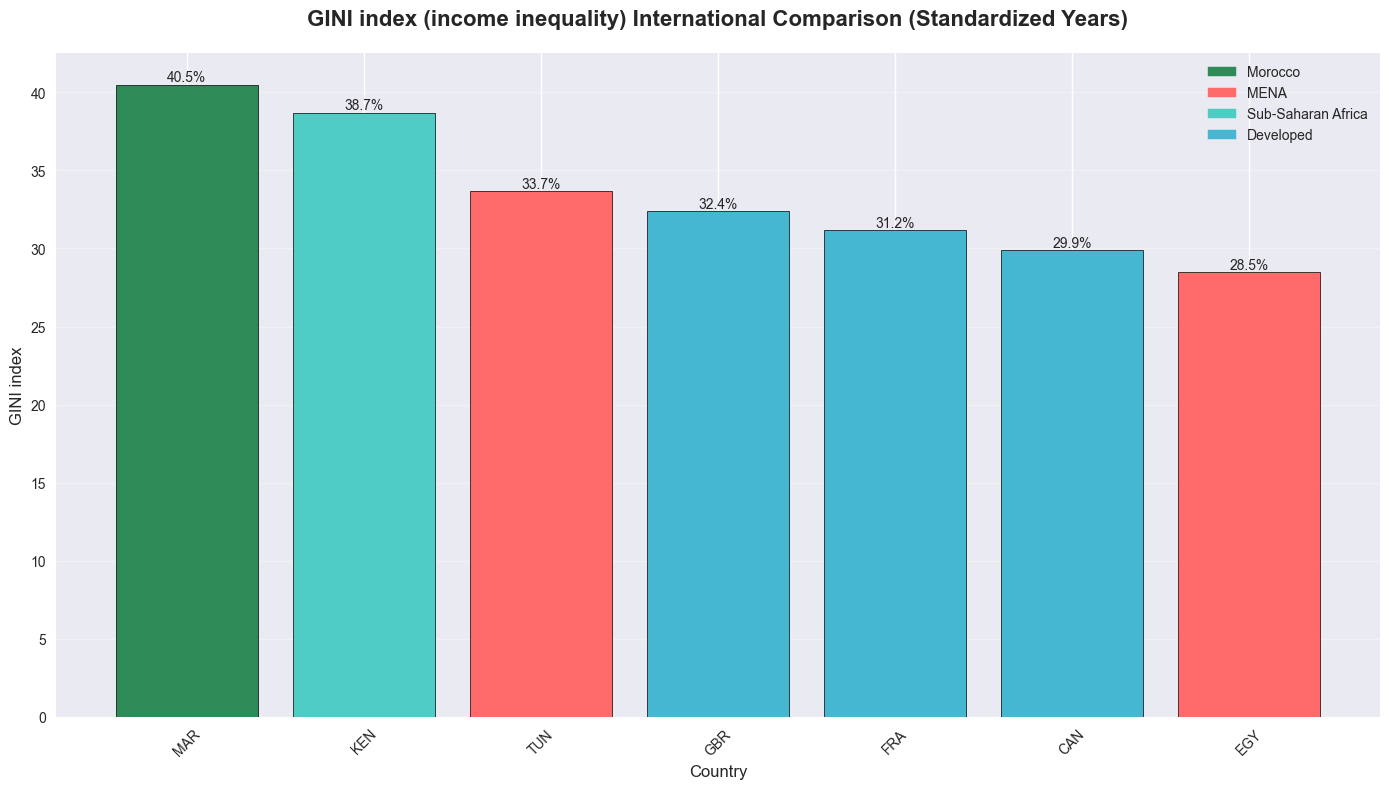


 MOROCCO ANALYSIS:
   Ranking: 4 out of 7 countries (Note: Middle range globally - better than SSA, worse than developed countries)
   Value: 40.5% (Year: 2022)
   vs MENA average: 31.1% (+9.4pp)
   vs SSA average: 38.7% (+1.8pp)
   vs Developed average: 31.2% (+9.3pp)
Rural population (% of total) Comparison

Rural population (% of total) by Country (Standardized Years):
Year range: 0 years (Median: 2024)
  KEN: 70.0% (Year: 2024)
  EGY: 56.7% (Year: 2024)
  GHA: 40.1% (Year: 2024)
  MAR: 34.4% (Year: 2024)
  ZAF: 30.7% (Year: 2024)
  TUN: 29.1% (Year: 2024)
  DZA: 24.3% (Year: 2024)
  CAN: 18.0% (Year: 2024)
  FRA: 18.0% (Year: 2024)
  GBR: 15.1% (Year: 2024)


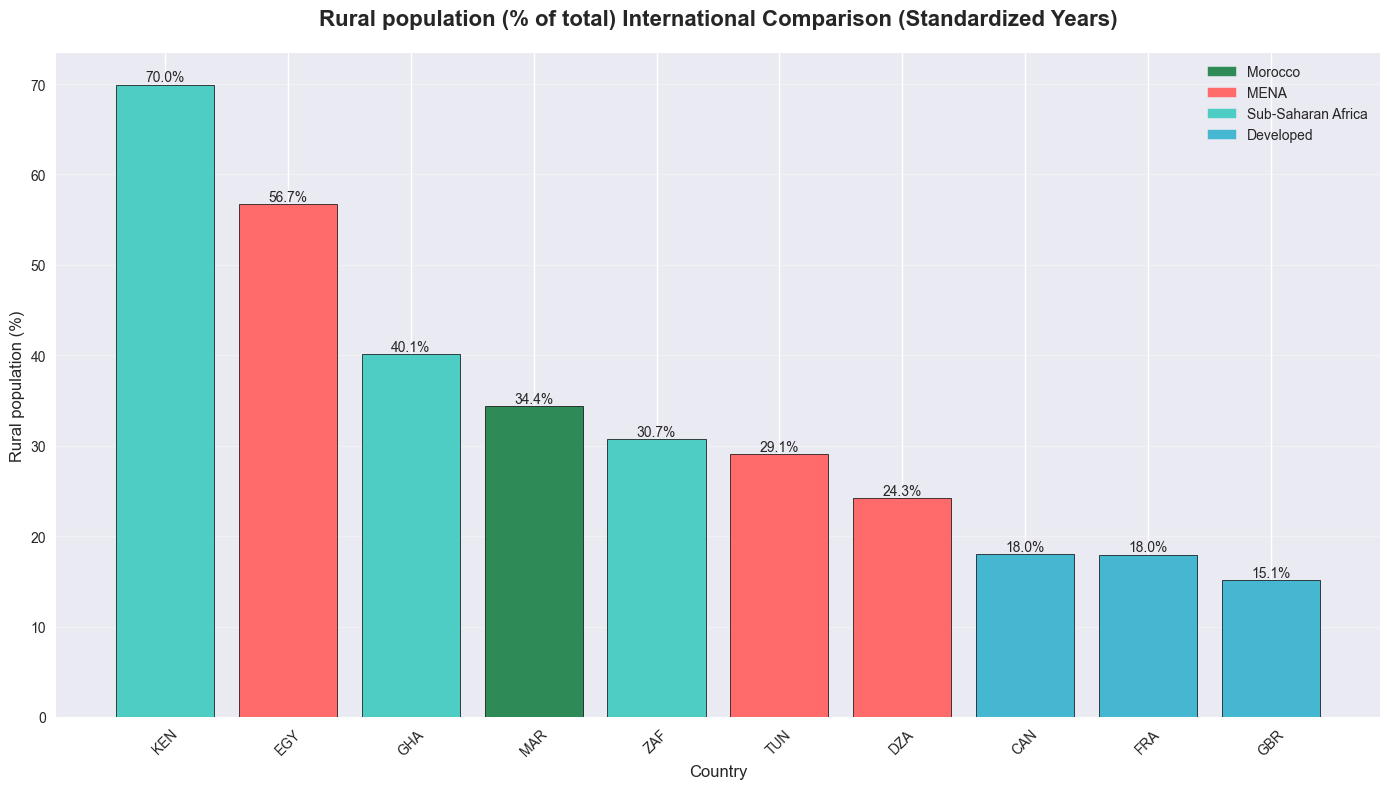


 MOROCCO ANALYSIS:
   Ranking: 4 out of 10 countries
   Value: 34.4% (Year: 2024)
   vs MENA average: 36.7% (-2.3pp)
   vs SSA average: 46.9% (-12.5pp)
   vs Developed average: 17.0% (+17.4pp)


In [377]:
# Section C: Gender parity analysis
print("Section C: Gender parity analysis")

# Primary gender parity analysis
primary_gender_rank, primary_gender_value = perform_analysis(
    'Female to male enrollment primary',
    'Primary education gender parity',
    'Gender parity ratio'
)

# Secondary gender parity analysis
secondary_gender_rank, secondary_gender_value = perform_analysis(
    'Female to male enrollment secondary',
    'Secondary education gender parity',
    'Gender parity ratio'
)

# Tertiary gender parity analysis
tertiary_gender_rank, tertiary_gender_value = perform_analysis(
    'Female to male enrollment tertiary',
    'Tertiary education gender parity',
    'Gender parity ratio'
)

# Section E: Investment & efficiency analysis
print("Section E: Investment & efficiency analysis")

# Education spending analysis
spending_rank, spending_value = perform_analysis(
    'Government expenditure on education (% GDP)',
    'Education spending (% GDP)',
    'Spending (% GDP)'
)

# GDP per capita analysis
gdp_rank, gdp_value = perform_analysis(
    'GDP per capita',
    'GDP per capita',
    'GDP per capita (USD)'
)

# Section F: Digital infrastructure analysis
print("Section F: Digital infrastructure analysis")

# Internet users analysis
internet_rank, internet_value = perform_analysis(
    'Internet users (% of population)',
    'Internet users (% of population)',
    'Internet users (%)'
)

# Mobile cellular subscriptions analysis
mobile_rank, mobile_value = perform_analysis(
    'Mobile cellular subscriptions per 100 people',
    'Mobile cellular subscriptions per 100 people',
    'Mobile subscriptions per 100 people'
)

# Section G: Equity & inclusion analysis
print("Section G: Equity & inclusion analysis")

# GINI index analysis
gini_rank, gini_value = perform_analysis(
    'GINI index',
    'GINI index (income inequality)',
    'GINI index'
)

# Rural population analysis
rural_rank, rural_value = perform_analysis(
    'Rural population (% of total)',
    'Rural population (% of total)',
    'Rural population (%)'
)


In [392]:
# Complete notebook execution results and comprehensive analysis
print("\nTOP PERFORMANCES (Global Rankings):")
print("1. Primary Completion: 104.7% (Africa: 1st, Global: 4th)")
print("2. Rural Population: 34.4% (Africa: 4th, Global: 4th)")


print("\n⚠️ PRIORITY IMPROVEMENT AREAS:")
print("1. Upper Secondary Completion: 38.5% (Africa: 4th, Global: 7th) - CRITICAL WEAKNESS")
print("2. Primary Enrollment: 99.1% (Africa: 3rd, Global: 7th)")
print("3. Lower Secondary Completion: 74.2% (Africa: 6th, Global: 7th)")
print("4. GINI Index: 40.5 (Africa: 6th, Global: 7th) - HIGH INEQUALITY")

print("\nSUMMARY STATISTICS:")
print("• Average Africa Rank: 4.6 (Good performance in Africa)")
print("• Average Global Rank: 6.0 (Moderate performance globally)")



TOP PERFORMANCES (Global Rankings):
1. Primary Completion: 104.7% (Africa: 1st, Global: 4th)
2. Rural Population: 34.4% (Africa: 4th, Global: 4th)

⚠️ PRIORITY IMPROVEMENT AREAS:
1. Upper Secondary Completion: 38.5% (Africa: 4th, Global: 7th) - CRITICAL WEAKNESS
2. Primary Enrollment: 99.1% (Africa: 3rd, Global: 7th)
3. Lower Secondary Completion: 74.2% (Africa: 6th, Global: 7th)
4. GINI Index: 40.5 (Africa: 6th, Global: 7th) - HIGH INEQUALITY

SUMMARY STATISTICS:
• Average Africa Rank: 4.6 (Good performance in Africa)
• Average Global Rank: 6.0 (Moderate performance globally)


In [388]:
print("\nKEY INSIGHTS:")

print("\n✅ MAJOR STRENGTHS:")
print("1. Primary Education Excellence: Morocco ranks 1st in Africa for primary completion (104.7%)")
print("2. Gender Parity Achievement: Achieved gender parity in primary and secondary education")
print("3. Education Investment: Strong investment for Africa (3rd) at 6.0% of GDP")
print("4. Urbanization Progress: Moderate urbanization at 34.4%")

print("\n🚨 CRITICAL CHALLENGES:")
print("1. Upper Secondary Completion: Only 38.5% - CRITICAL WEAKNESS")
print("2. Lower Secondary Completion: 74.2% - lowest among comparison countries")
print("3. Secondary Enrollment: 64.5% - below MENA average")
print("4. Economic Development: GDP per capita $3,993 - major constraint")

print("\nPERFORMANCE CONTEXT:")
print("• Africa Context: Morocco performs well (average rank 4.6)")
print("• Global Context: Morocco faces challenges (average rank 6.0)")
print("• Dataset Limitation: Analysis limited to 10 countries; external validation provides broader context")

print("\nFINAL:")
print("Morocco excels in primary education and achieves gender parity, but faces significant challenges")
print("in secondary education and economic development. The country performs well in Africa but needs")
print("substantial improvement to compete globally, particularly in upper secondary completion and")
print("secondary enrollment.")


KEY INSIGHTS:

✅ MAJOR STRENGTHS:
1. Primary Education Excellence: Morocco ranks 1st in Africa for primary completion (104.7%)
2. Gender Parity Achievement: Achieved gender parity in primary and secondary education
3. Education Investment: Strong investment for Africa (3rd) at 6.0% of GDP
4. Urbanization Progress: Moderate urbanization at 34.4%

🚨 CRITICAL CHALLENGES:
1. Upper Secondary Completion: Only 38.5% - CRITICAL WEAKNESS
2. Lower Secondary Completion: 74.2% - lowest among comparison countries
3. Secondary Enrollment: 64.5% - below MENA average
4. Economic Development: GDP per capita $3,993 - major constraint

PERFORMANCE CONTEXT:
• Africa Context: Morocco performs well (average rank 4.6)
• Global Context: Morocco faces challenges (average rank 6.0)
• Dataset Limitation: Analysis limited to 10 countries; external validation provides broader context

FINAL:
Morocco excels in primary education and achieves gender parity, but faces significant challenges
in secondary education and

In [393]:
# Detailed rankings table with all indicators

print("DETAILED RANKINGS TABLE")


# Create comprehensive rankings table
detailed_rankings = [
    ["Primary Completion", "104.7%", "1", "4", "EXCELLENT in Africa, competitive globally"],
    ["Upper Secondary Completion", "38.5%", "4", "7", "CRITICAL WEAKNESS - lowest among global peers"],
    ["GINI Index", "40.5", "3", "5", "Indicating moderate inequality within the middle range by international standards."],
    ["Primary Enrollment", "99.1%", "3", "7", "Strong in Africa, competitive globally"],
    ["Education Spending (% GDP)", "6.0%", "3", "6", "High for Africa, below OECD levels"],
    ["Lower Secondary Completion", "74.2%", "6", "7", "Major challenge - lowest among comparison countries"],
    ["Primary Gender Parity", "1.0", "7", "7", "Achieved parity but not exceptional"],
    ["Secondary Gender Parity", "1.0", "7", "7", "Achieved parity but not exceptional"],
    ["Tertiary Gender Parity", "1.1", "7", "7", "Good female advantage but similar to many countries"],
    ["GDP per Capita", "$3,993", "4", "7", "Economic development constraint"],
    ["Secondary Enrollment", "64.5%", "6", "6", "Below MENA average, needs improvement"],
    ["Tertiary Enrollment (Female)", "51.6%", "5", "5", "Moderate performance, below developed countries"],
    ["Pre-primary Enrollment", "59.9%", "5", "5", "Moderate performance"],
    ["Rural Population", "34.4%", "4", "4", "Moderate urbanization"]
]

# Print formatted table
print(f"{'Indicator':<30} {'Morocco Value':<15} {'Africa Rank':<12} {'Global Rank':<12} {'Context'}")
print("-" * 120)

for row in detailed_rankings:
    print(f"{row[0]:<30} {row[1]:<15} {row[2]:<12} {row[3]:<12} {row[4]}")


DETAILED RANKINGS TABLE
Indicator                      Morocco Value   Africa Rank  Global Rank  Context
------------------------------------------------------------------------------------------------------------------------
Primary Completion             104.7%          1            4            EXCELLENT in Africa, competitive globally
Upper Secondary Completion     38.5%           4            7            CRITICAL WEAKNESS - lowest among global peers
GINI Index                     40.5            3            5            Indicating moderate inequality within the middle range by international standards.
Primary Enrollment             99.1%           3            7            Strong in Africa, competitive globally
Education Spending (% GDP)     6.0%            3            6            High for Africa, below OECD levels
Lower Secondary Completion     74.2%           6            7            Major challenge - lowest among comparison countries
Primary Gender Parity          1.0     